In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing 
from yellowbrick.features import Rank1D
from yellowbrick.features import Rank2D
from yellowbrick.features import PCADecomposition
Data = pd.read_csv("kddtrain.csv", header=None)

In [2]:
Columns = ["duration","protocol_type","service","flag","src_bytes",
 "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
 "logged_in","num_compromised","root_shell","su_attempted","num_root",
 "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
 "is_host_login","is_guest_login","count","srv_count","serror_rate",
 "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
 "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
 "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
 "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
 "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

In [3]:
Data = pd.read_csv("kddtrain.csv", header=None, names = Columns)
Data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label', 'difficulty'],
      dtype='object')

In [4]:
Data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [5]:
Data.protocol_type = preprocessing.LabelEncoder().fit_transform(Data["protocol_type"])
Data.service = preprocessing.LabelEncoder().fit_transform(Data["service"])
Data.flag = preprocessing.LabelEncoder().fit_transform(Data["flag"])
Data.label = preprocessing.LabelEncoder().fit_transform(Data["label"])

In [6]:
X = Data[Columns].values 
y = Data.label.values

C:\Users\23076\anaconda3\envs\tensorflow\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\23076\anaconda3\envs\tensorflow\lib\site-packages\scipy\stats\_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


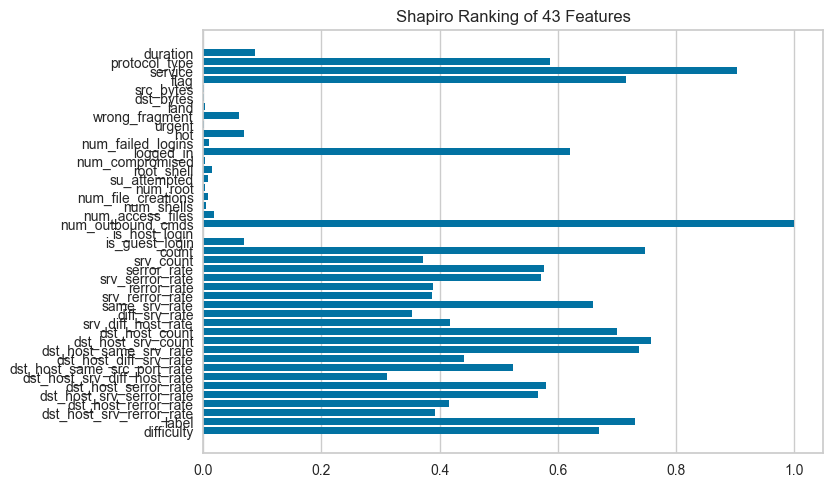

<Axes: title={'center': 'Shapiro Ranking of 43 Features'}>

In [7]:
visualizer = Rank1D(features=Columns, algorithm='shapiro')
visualizer.fit(X, y) 
visualizer.transform(X) 
visualizer.show()

In [8]:
visualizer.poof(outpath="Figure1.png") 

<Axes: title={'center': 'Shapiro Ranking of 43 Features'}>

<Figure size 800x550 with 0 Axes>

In [9]:
visualizer = Rank2D(features=Columns, algorithm='covariance')

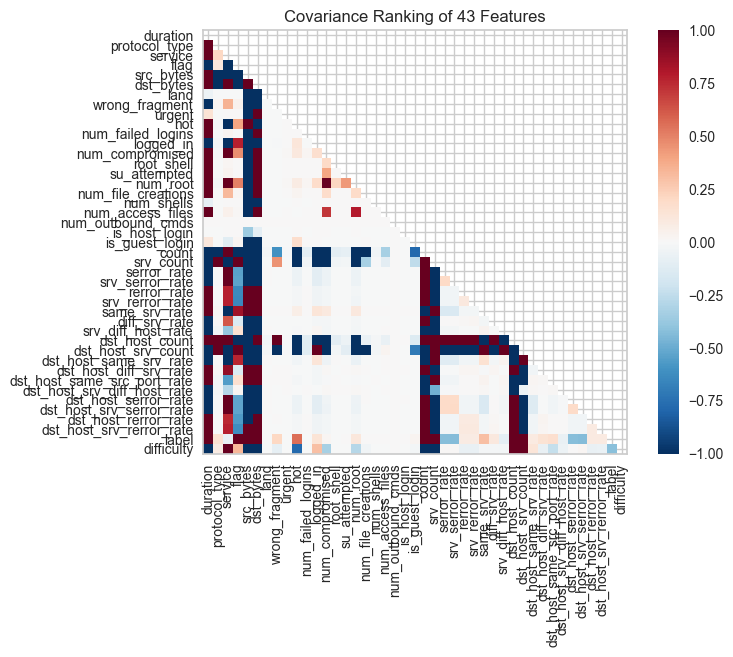

<Axes: title={'center': 'Covariance Ranking of 43 Features'}>

In [10]:
visualizer.fit(X, y)
visualizer.transform(X)
visualizer.show()

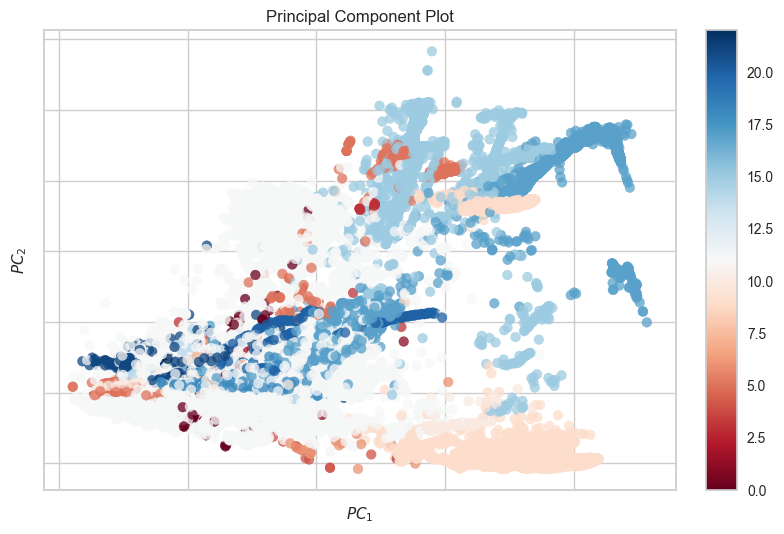

<Axes: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [11]:
visualizer = PCADecomposition(scale=True, center=False, col=y)
visualizer.fit_transform(X,y)
visualizer.show()

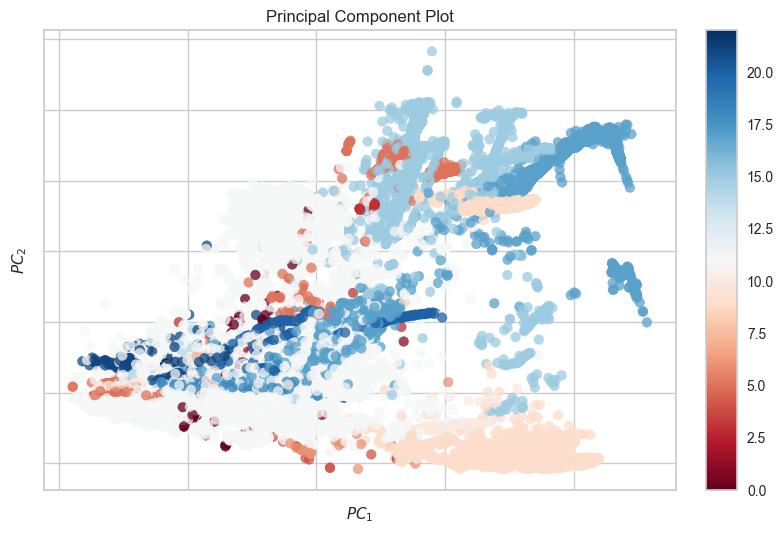

<Axes: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [12]:
visualizer = PCADecomposition(scale=True, center=False, color=y, proj_dim=3)
visualizer.fit_transform(X,y)
visualizer.show()

In [13]:
from sklearn.model_selection import train_test_split
# 分割数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# 然后您可以在训练集上训练模型
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
# 最后评估模型在测试集上的性能
Score = clf.score(X_test, y_test)
print(Score * 100)

86.18376662036118
